# [Linear regression](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Lectures/L0-Linear_regression.ipynb)

## Case

There is a company which spends money on advertisement for different media channels: TV, radio and newspaper.

## Task:

  - suggest marketing plan to increase sales units
  - use linear regression to predict sales based on different spendings on different marketing channels

## Data warmup

In [440]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

advertising_raw = pandas.read_csv('../data/Advertising.csv', index_col=0)

In [441]:
advertising_raw.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [442]:
advertising_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [443]:
advertising_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Only want to select the features in the data IE not sales column

In [444]:
advertising_raw.columns[:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [445]:
advertising_raw.shape # Corresponds to matrix size

(200, 4)

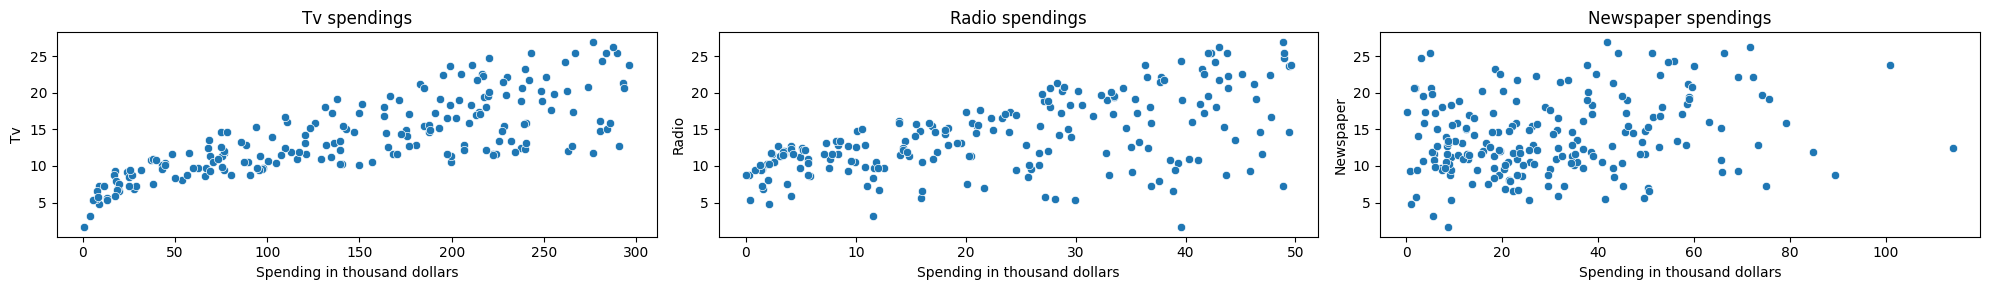

In [446]:
number_of_features = advertising_raw.shape[1] - 1 # The second element in shape is number of columns of the dataframe
fig, ax = pyplot.subplots(1, number_of_features, figsize=(20, 3), dpi=100)

for index, feature in enumerate(advertising_raw.columns[:-1]):
    seaborn.scatterplot(data=advertising_raw, x=feature, y="sales", ax=ax[index])
    ax[index].set(
        xlabel="Spending in thousand dollars",
        title=f"{feature.capitalize()} spendings",
        ylabel=feature.capitalize(),
    )

fig.tight_layout()

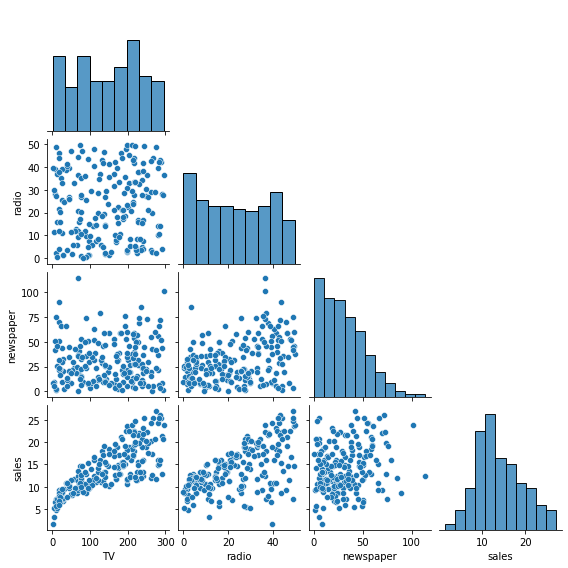

In [447]:
seaborn.pairplot(advertising_raw, corner=True, height=2)

## Simple linear regression

TODO skriv formel

In [448]:
X, y = advertising_raw['TV'], advertising_raw['sales']

X, y

(1      230.1
 2       44.5
 3       17.2
 4      151.5
 5      180.8
        ...  
 196     38.2
 197     94.2
 198    177.0
 199    283.6
 200    232.1
 Name: TV, Length: 200, dtype: float64,
 1      22.1
 2      10.4
 3       9.3
 4      18.5
 5      12.9
        ... 
 196     7.6
 197     9.7
 198    12.8
 199    25.5
 200    13.4
 Name: sales, Length: 200, dtype: float64)

In [449]:
beta_1, beta_0 = numpy.polyfit(X, y, deg = 1)
print(f'Intercept: {beta_0}\nSlope: {beta_1}')

Intercept: 7.032593549127696
Slope: 0.04753664043301972


<AxesSubplot:xlabel='TV', ylabel='sales'>

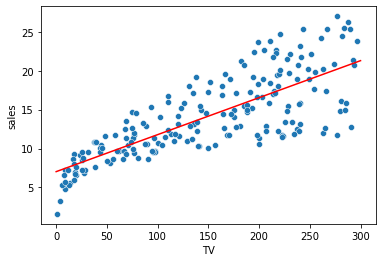

In [450]:
def y_hat(x): return beta_0 + beta_1*x

spend = numpy.linspace(0,300)

seaborn.scatterplot(data= advertising_raw, x = 'TV', y ='sales')
seaborn.lineplot(x=spend, y=y_hat(spend), color='red')

<AxesSubplot:xlabel='TV', ylabel='sales'>

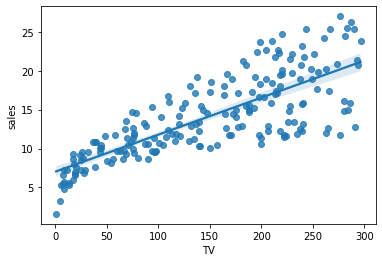

In [451]:
seaborn.regplot(x=X, y=y)

## Multiple linear regression

TODO skriv formel

In [452]:
X, y = advertising_raw.drop('sales', axis='columns'), advertising_raw['sales']
X.head(), y.head()

(      TV  radio  newspaper
 1  230.1   37.8       69.2
 2   44.5   39.3       45.1
 3   17.2   45.9       69.3
 4  151.5   41.3       58.5
 5  180.8   10.8       58.4,
 1    22.1
 2    10.4
 3     9.3
 4    18.5
 5    12.9
 Name: sales, dtype: float64)

In [453]:
def regression_fit(X, y):
    return numpy.linalg.inv(X.T @ X) @ X.T @ y

In [454]:
regression_fit(X,y)

0    0.053792
1    0.222227
2    0.016816
dtype: float64

In [455]:
X.insert(0, 'intercept', 1)

In [456]:
beta_hat = regression_fit(X,y)
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [457]:
def predict(x, beta): return numpy.dot(x, beta)

In [458]:
test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)
y_hat

20.523974409715148

In [459]:
print(f'Predicted value for this sample {y_hat:.2f}')
print(f'True value for this sample {y.iloc[0]}')

Predicted value for this sample 20.52
True value for this sample 22.1


## Train|test split

In [460]:
train_fraction = int(len(advertising_raw)*.7)
print(f'Samples for traning data: {train_fraction}\nSamples for test data: {len(advertising_raw)- train_fraction}')

Samples for traning data: 140
Samples for test data: 60


In [461]:
train_data = advertising_raw.sample(n= train_fraction, random_state=42, replace=False)
test_data = advertising_raw.drop(train_data.index)

train_data.index.isin(test_data.index).sum() # Check if test_data does not exist in train_data

0

In [462]:
X_train, y_train = train_data.drop('sales', axis='columns'), train_data['sales']
X_test, y_test = test_data.drop('sales', axis='columns'), test_data['sales']

X_train.head()

,TV,radio,newspaper
96,163.3,31.6,52.9
16,195.4,47.7,52.9
31,292.9,28.3,43.2
159,11.7,36.9,45.2
129,220.3,49.0,3.2


In [463]:
y_train.head()

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: sales, dtype: float64

In [464]:
X_train.shape, y_train.shape

((140, 3), (140,))

In [465]:
type(X_train)

pandas.core.frame.DataFrame

In [466]:
type(y_train)

pandas.core.series.Series

In [467]:
X_train.insert(0, 'Intercept', 1) # mutering
X_test.insert(0, 'Intercept', 1)

X_train.head()

,Intercept,TV,radio,newspaper
96,1,163.3,31.6,52.9
16,1,195.4,47.7,52.9
31,1,292.9,28.3,43.2
159,1,11.7,36.9,45.2
129,1,220.3,49.0,3.2


## Prediction

beta_hat = weight vector

In [468]:
beta_hat = regression_fit(X_train, y_train)
beta_hat

0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64

In [469]:
beta_hat.shape

(4,)

In [470]:
beta_hat.to_numpy()

array([ 2.95609427,  0.04679253,  0.18706314, -0.00480492])

In [471]:
beta_hat.to_numpy().shape

(4,)

In [472]:
beta_hat.to_numpy().reshape(4,1)

array([[ 2.95609427],
       [ 0.04679253],
       [ 0.18706314],
       [-0.00480492]])

[ 
  [ 2.77864834], b_0 intercept
  [ 0.04742527], b_1 x1 Tv
  [ 0.18877457], b_2 x2 Radio
  [-0.0049591 ]  b_3 x3 New_paper
] 

In [473]:
beta_hat.to_numpy().reshape(4,1).shape

(4, 1)

In [474]:
def predict(X, weights): return X @ weights

y_hat == predictions of column sales in this case

In [475]:
y_hat = predict(X_test.to_numpy(), beta_hat.to_numpy().reshape(4,1))
y_hat[:5], y_test[:5]

(array([[12.17324122],
        [12.19125728],
        [ 3.74653773],
        [ 8.90545078],
        [18.43980126]]),
 2     10.4
 8     13.2
 9      4.8
 14     9.7
 15    19.0
 Name: sales, dtype: float64)

In [476]:
y_test.shape, y_hat.shape

((60,), (60, 1))

In [477]:
y_test.to_numpy().reshape(y_hat.shape).shape

(60, 1)

In [478]:
X_test.to_numpy().reshape(-1,2).shape

(120, 2)

In [479]:
X_test.shape, beta_hat.shape

((60, 4), (4,))

In [480]:
beta_hat.to_numpy().reshape(4,1)

array([[ 2.95609427],
       [ 0.04679253],
       [ 0.18706314],
       [-0.00480492]])

## Evaluating performance of model

In [481]:
y_hat.shape

(60, 1)

In [482]:
number_of_samples = len(y_test)
y_hat = y_hat.reshape(number_of_samples)

In [483]:
y_hat.shape, y_test.shape

((60,), (60,))

In [484]:
numpy.sum(y_hat - y_test)

3.8225379005571645

In [485]:
numpy.sum(y_test - y_hat)

-3.8225379005571645

In [486]:
numpy.sum(numpy.abs(y_hat - y_test)) # Abs gör att de kommuterar och då summerar man bara bara positiva tal

79.46694575835913

### MAE Mean absolute error

In [487]:
1 / number_of_samples * numpy.sum(numpy.abs(y_hat - y_test))

1.3244490959726523

1.32K

### MSE - Mean squared error

In [492]:
1 / number_of_samples * numpy.sum(numpy.power(y_test - y_hat, 2))

3.540425618238498

3.54K units ^ 2 = 3.54M

### RMSE - Root mean squared error

In [494]:
numpy.sqrt(1 / number_of_samples *numpy.sum(numpy.power(y_test - y_hat, 2)))

1.8816018755939041

1.88K units